In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('C:\\Users\\Jai Ganesh\\OneDrive\\Desktop\\crd2.csv')
df.head()

,Soil moisture,humidity,water level,temperature,label
0,378,82.002744,202.935536,20.879744,fertile
1,256,80.319644,226.655537,21.770462,non-fertile
2,356,82.320763,263.964248,23.004459,non-fertile
3,316,80.158363,242.864034,26.491096,non-fertile
4,280,81.604873,262.717340,20.130175,fertile


In [3]:
df.describe()

,Soil moisture,humidity,water level,temperature
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,311.633636,71.481779,103.463655,25.616244
std,69.436623,22.263812,54.958389,5.063749
min,150.000000,14.258040,20.211267,8.825675
25%,290.000000,60.261953,64.551686,22.769375
50%,306.000000,80.473146,94.867624,25.598693
75%,319.000000,89.948771,124.267508,28.561654
max,647.000000,99.981876,298.560117,43.675493


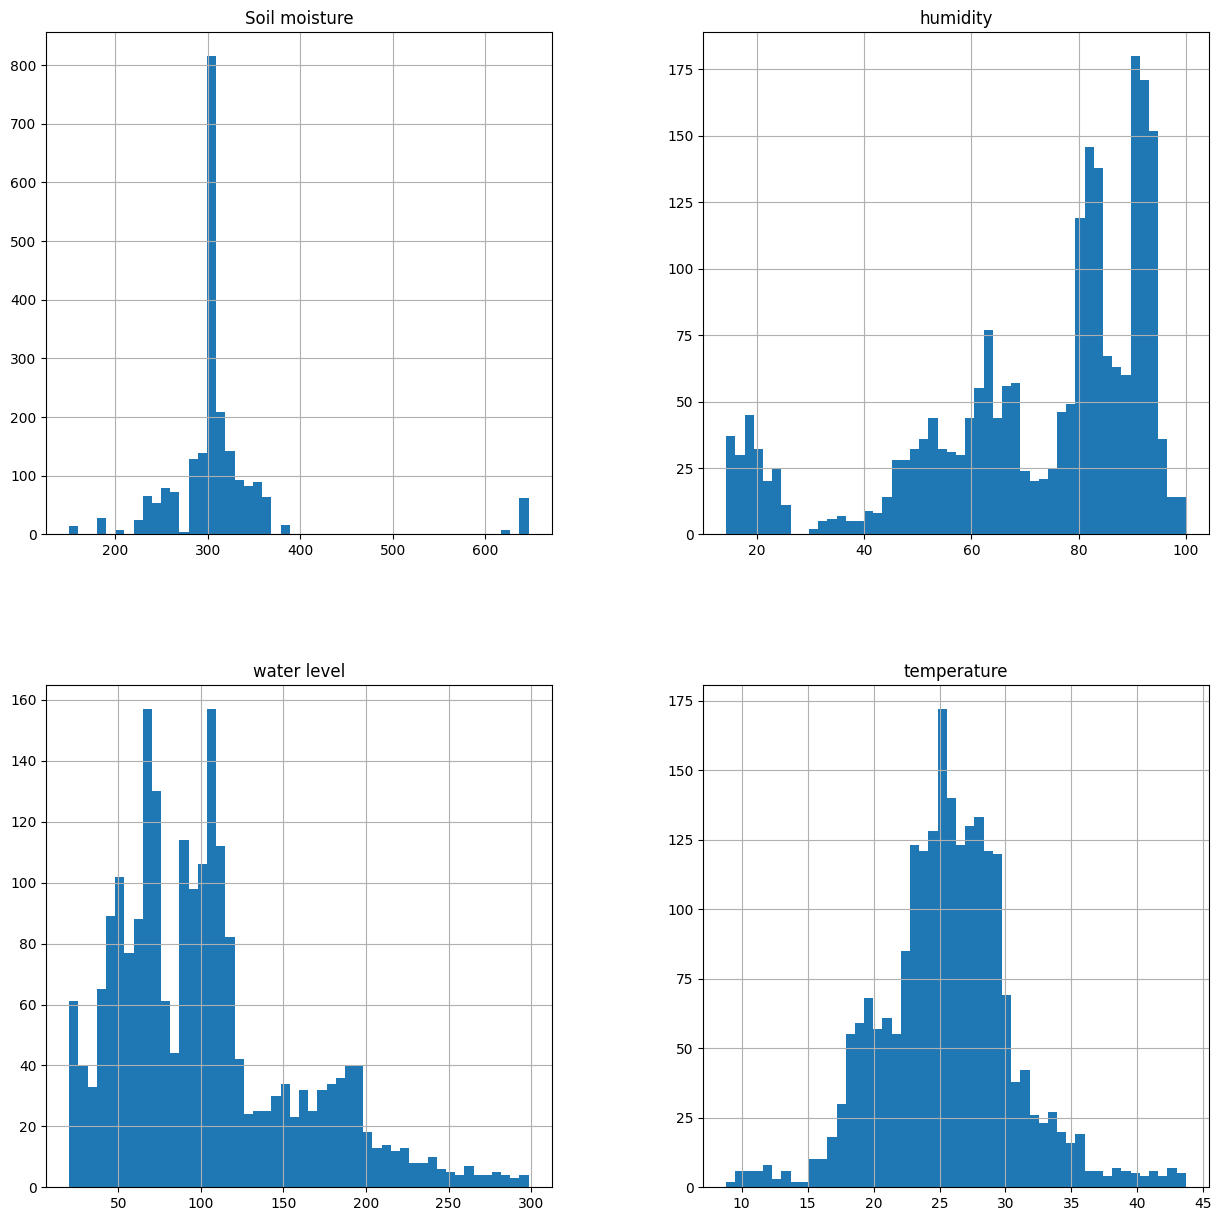

In [4]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

In [5]:
df.diff

<bound method DataFrame.diff of       Soil moisture   humidity  water level  temperature        label
0               378  82.002744   202.935536    20.879744      fertile
1               256  80.319644   226.655537    21.770462  non-fertile
2               356  82.320763   263.964248    23.004459  non-fertile
3               316  80.158363   242.864034    26.491096  non-fertile
4               280  81.604873   262.717340    20.130175      fertile
...             ...        ...          ...          ...          ...
2195            354  66.413269   177.774507    26.774637  non-fertile
2196            359  56.636362   127.924610    27.417112      fertile
2197            302  67.225123   173.322839    24.131797      fertile
2198            308  52.127394   127.175293    26.272418      fertile
2199            284  60.396475   140.937041    23.603016  non-fertile

[2200 rows x 5 columns]>

In [6]:
columns = ['temperature', 'humidity', 'water level', 'Soil moisture', 'label']
for col in columns:
    print(col, "\n", df[col].unique(), "\n")

temperature 
 [20.87974371 21.77046169 23.00445915 ... 24.13179691 26.2724184
 23.60301571] 

humidity 
 [82.00274423 80.31964408 82.3207629  ... 67.22512329 52.12739421
 60.39647474] 

water level 
 [202.9355362 226.6555374 263.9642476 ... 173.3228386 127.1752928
 140.9370415] 

Soil moisture 
 [378 256 356 316 280 302 310 330 345 290 250 240 232 225 320 380 296 230
 255 314 332 312 188 187 182 183 208 231 248 220 157 150 258 338 354 359
 308 284 265 263 259 647 323 319 315 307 306 303 304 299 620 300 301 305
 350 270 325 295 329 333 348 309 324 334 285 245 340 365 317 243 235 645] 

label 
 ['fertile' 'non-fertile'] 



In [7]:
for col in columns:
    print(df[col].isnull)

<bound method Series.isnull of 0       20.879744
1       21.770462
2       23.004459
3       26.491096
4       20.130175
          ...    
2195    26.774637
2196    27.417112
2197    24.131797
2198    26.272418
2199    23.603016
Name: temperature, Length: 2200, dtype: float64>
<bound method Series.isnull of 0       82.002744
1       80.319644
2       82.320763
3       80.158363
4       81.604873
          ...    
2195    66.413269
2196    56.636362
2197    67.225123
2198    52.127394
2199    60.396475
Name: humidity, Length: 2200, dtype: float64>
<bound method Series.isnull of 0       202.935536
1       226.655537
2       263.964248
3       242.864034
4       262.717340
           ...    
2195    177.774507
2196    127.924610
2197    173.322839
2198    127.175293
2199    140.937041
Name: water level, Length: 2200, dtype: float64>
<bound method Series.isnull of 0       378
1       256
2       356
3       316
4       280
       ... 
2195    354
2196    359
2197    302
2198    308
2199   

In [8]:
le = preprocessing.LabelEncoder()
X = df.iloc[:, 0:4]
y = df['label']
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)
y

array([0, 1, 1, ..., 0, 0, 1])

In [9]:
from sklearn import svm #Support Vector Machine
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)
acc=accuracy_score(y_test, pred)*100
print('Accuracy: ',acc)
print('Precision: %.3f' % precision_score(y_test, pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, pred,average='micro'))

Accuracy:  90.0
Precision: 0.900
Recall: 0.900
F1 Score: 0.900


In [10]:
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent
clf = SGDClassifier(alpha=0.001, max_iter=600)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, pred)*100
print('Accuracy: ',acc)
print('Precision: %.3f' % precision_score(y_test, pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, pred,average='micro'))

Accuracy:  90.0
Precision: 0.900
Recall: 0.900
F1 Score: 0.900


In [11]:
from sklearn.neighbors import KNeighborsClassifier #K- Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc=accuracy_score(y_test, pred)*100
print('Accuracy: ',acc)
print('Precision: %.3f' % precision_score(y_test, pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, pred,average='micro'))

Accuracy:  70.0
Precision: 0.700
Recall: 0.700
F1 Score: 0.700


In [12]:
from sklearn.naive_bayes import GaussianNB #naive bayes
gnb = GaussianNB()
pred = gnb.fit(X_train, y_train).predict(X_test)
acc=accuracy_score(y_test, pred)*100
print('Accuracy: ',acc)
print('Precision: %.3f' % precision_score(y_test, pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, pred,average='micro'))

Accuracy:  90.0
Precision: 0.900
Recall: 0.900
F1 Score: 0.900


In [13]:
from sklearn.tree import DecisionTreeClassifier #decisiontree
clf = DecisionTreeClassifier(random_state=0, max_depth=10)
pred = clf.fit(X_train, y_train).predict(X_test)
acc=accuracy_score(y_test, pred)*100
print('Accuracy: ',acc)
print('Precision: %.3f' % precision_score(y_test, pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, pred,average='micro'))

Accuracy:  50.0
Precision: 0.500
Recall: 0.500
F1 Score: 0.500
